<a href="https://colab.research.google.com/github/hosseinrezaie0/30-AI-Projects-in-30-Days/blob/main/Day%203/SpamEmailDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/spambase.csv')

In [3]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
data.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [5]:
data['spam'].unique()

array([1, 0])

In [6]:
(data['spam'] == 0).sum()

np.int64(2788)

In [7]:
(data['spam'] == 1).sum()

np.int64(1813)

In [8]:
data = data.sample(frac=1, random_state=42)

In [9]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
3683,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.0,0.0,0.0,1.000,1,3,0
4412,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.00,0.0,0.71,...,0.0,0.000,0.000,0.0,0.0,0.0,1.032,2,32,0
2584,0.00,0.0,0.91,0.0,0.0,0.0,0.0,0.45,0.0,0.00,...,0.0,0.000,0.000,0.0,0.0,0.0,1.320,7,103,0
69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.201,0.000,0.0,0.1,0.0,4.548,59,141,1
1844,0.00,0.0,0.54,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.188,0.047,0.0,0.0,0.0,1.745,12,89,0


In [10]:
X = data.drop('spam', axis=1)
y = data['spam']

In [11]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.000,1,3
4412,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.00,0.0,0.71,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.032,2,32
2584,0.00,0.0,0.91,0.0,0.0,0.0,0.0,0.45,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.320,7,103
69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.201,0.000,0.0,0.1,0.0,4.548,59,141
1844,0.00,0.0,0.54,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.188,0.047,0.0,0.0,0.0,1.745,12,89


In [12]:
y.head()

,spam
3683,0
4412,0
2584,0
69,1
1844,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3680 entries, 1434 to 3793
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3680 non-null   float64
 1   word_freq_address           3680 non-null   float64
 2   word_freq_all               3680 non-null   float64
 3   word_freq_3d                3680 non-null   float64
 4   word_freq_our               3680 non-null   float64
 5   word_freq_over              3680 non-null   float64
 6   word_freq_remove            3680 non-null   float64
 7   word_freq_internet          3680 non-null   float64
 8   word_freq_order             3680 non-null   float64
 9   word_freq_mail              3680 non-null   float64
 10  word_freq_receive           3680 non-null   float64
 11  word_freq_will              3680 non-null   float64
 12  word_freq_people            3680 non-null   float64
 13  word_freq_report            3680 no

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = model.predict(x_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9261672095548317
Precision: 0.9138381201044387
Recall: 0.9090909090909091
F1 Score: 0.9114583333333334


Text(0.5, 1.0, 'Confusion matrix')

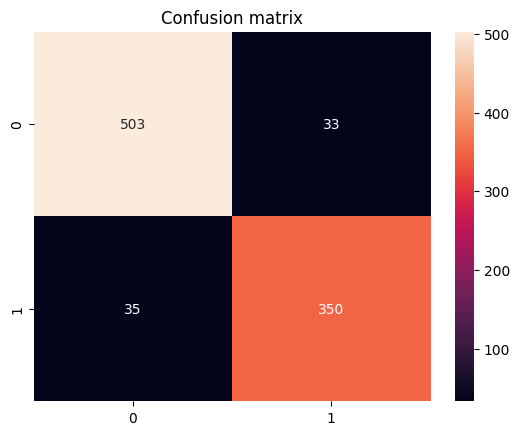

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion matrix")